In [1]:
import xarray as xr
import numpy as np

import sys
sys.path.append('..')
from wxdata.cfs import cfsr_6h_apply

In [2]:
def lat_avg_vwind(ds_url, isentrope, min_lat, max_lat):
    ds = xr.open_dataset(ds_url)
    lat_band_data = ds['v-component_of_wind_isentrope'].sel(lat=slice(max_lat, min_lat), isentrope=isentrope)
    return lat_band_data.mean(dim='lat')

In [3]:
from functools import partial

may03_vwind = cfsr_6h_apply('ipv', '2003-04-10 12:00', '2003-05-11 12:00', 
                      apply=partial(lat_avg_vwind, min_lat=40, max_lat=60, isentrope=330),
                      timestep='12 hr')

In [4]:
vwind_series = xr.concat(may03_vwind, dim='time')

In [5]:
vwind_series

<xarray.DataArray 'v-component_of_wind_isentrope' (time: 62, lon: 720)>
array([[-6.199999, -6.614633, -6.90244 , ..., -4.534146, -5.141464, -5.699999],
       [ 1.882928,  1.387805,  0.870732, ...,  3.421951,  2.917074,  2.385365],
       [ 1.639024,  1.785366,  1.9     , ...,  1.229269,  1.317073,  1.485366],
       ..., 
       [ 5.392683,  7.02927 ,  8.504878, ...,  1.543903,  2.492683,  3.812194],
       [ 1.178048,  1.358536,  1.746342, ...,  1.319512,  1.195122,  1.139024],
       [ 7.219512,  6.751222,  6.290245, ...,  8.704878,  8.19756 ,  7.695122]], dtype=float32)
Coordinates:
  * lon        (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
    isentrope  float32 330.0
    reftime    (time) datetime64[ns] 2003-04-10T12:00:00 2003-04-11 ...
  * time       (time) datetime64[ns] 2003-04-10T12:00:00 2003-04-11 ...

In [6]:
neglvls = [-50 + i*5 for i in range(8)]
poslvls = [50 - i*5 for i in range(8)]
poslvls.reverse()
levels = neglvls + poslvls

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


Text(0.5,0.98,'330K V-wind component averaged between 40°N-60°N, April-May 2003')

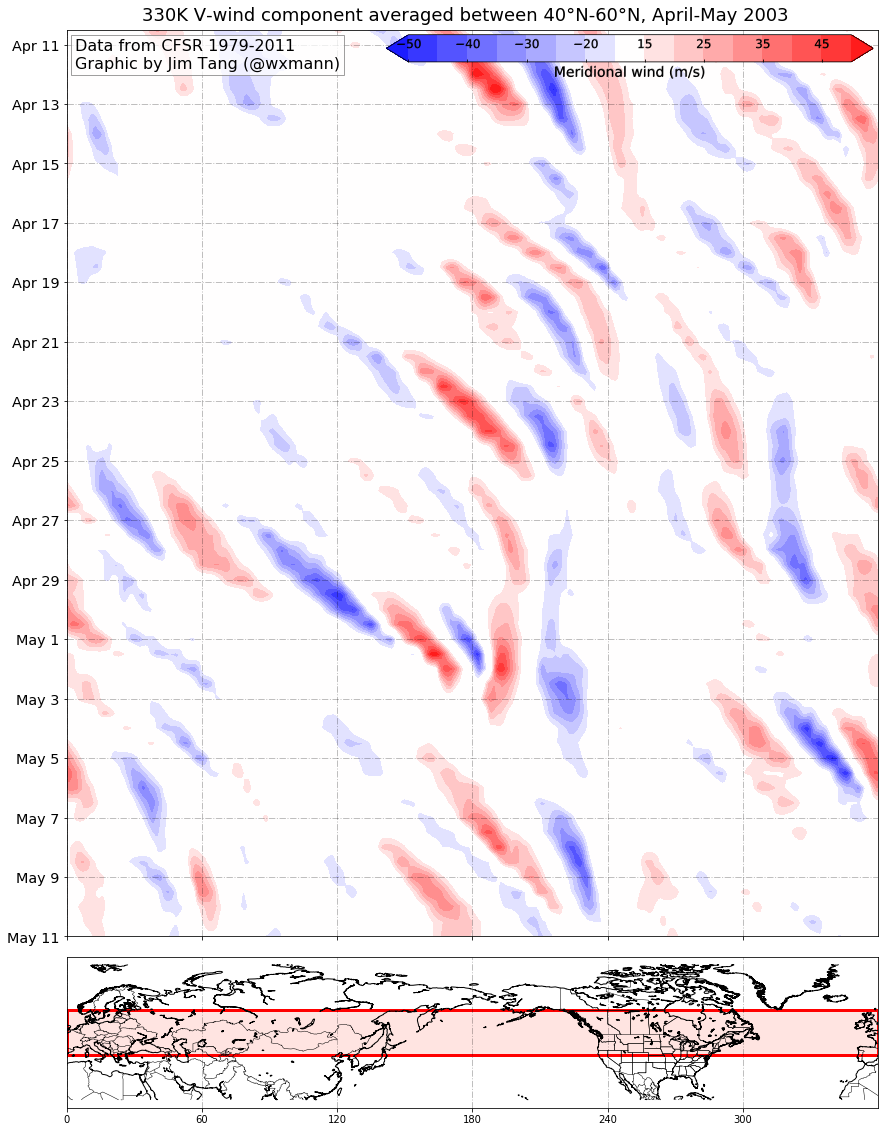

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

from wxdata.plotting import top_left_textbox, draw_latlon_box, inset_colorbar
from wxdata.extras import hovmoller_with_map

fig, (ax1, ax2), mappable, basemap = hovmoller_with_map(vwind_series, map_bbox=(0, 360, 20, 80), 
                                                        plot_kw=dict(levels=levels, cmap='bwr', yincrease=False))
fig.subplots_adjust(top=0.96)

top_left_textbox(ax1, 'Data from CFSR 1979-2011\nGraphic by Jim Tang (@wxmann)')
inset_colorbar(mappable, ax1, title='Meridional wind (m/s)')
draw_latlon_box(basemap, (0, 360, 40, 60), facecolor='mistyrose', edgecolor='red', linewidth=3)

plt.suptitle('330K V-wind component averaged between 40°N-60°N, April-May 2003', 
             fontsize=18)